# Additional ressources

* Burkov, A. (2019). The hundred-page machine learning book (Vol. 1). Canada: Andriy Burkov. ([Available online](http://themlbook.com/wiki/doku.php))
     * [3.1: Linear regression](https://www.dropbox.com/s/qiq2c85cle9ydb6/Chapter3.pdf?dl=0)
     * [4.2: Gradient descent](https://www.dropbox.com/s/xpd5x6p6jte3th5/Chapter4.pdf?dl=0)
* [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

# Import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Get the order of colors for pretty plot
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Generate some data

In [2]:
w = 2
b = -25

x = np.linspace(0, 100, 1000)
y = w * x + b + np.random.normal(0, 10, x.size)

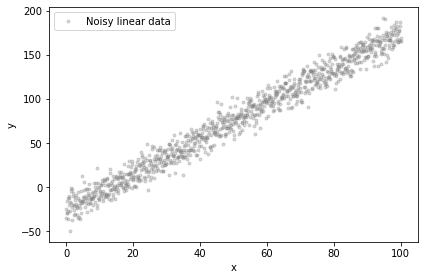

In [3]:
fig1, ax1 = plt.subplots()
ax1.scatter(x, y, color=colors[7], marker='.',
            alpha=0.3, label='Noisy linear data')
ax1.set(xlabel='x', ylabel='y')
ax1.legend()
fig1.tight_layout()
plt.show()

# Manual linear regression

## Update rule

### Algorithm

### Implementation

In [4]:
def update_weights(x, y, w, b, alpha):
    """
    Update the weights, w and b, according to the data x,y 
    and learning rate alpha.
    """

    N = len(x)

    # Determine the partial derivatives (eq. 1)

    dl_dw = 0.0
    dl_db = 0.0

    for i in range(N):
        dl_dw += -2 * x[i] * (y[i] - (w*x[i] + b))
        dl_db += -2 * (y[i] - (w*x[i] + b))

    dl_dw /= float(N)
    dl_db /= float(N)

    # Update the weights (eq.2)

    w -= alpha * dl_dw
    b -= alpha * dl_db

    return w, b

## Training

In [5]:
def train(x, y, w, b, alpha, epochs):
    for i in range(epochs):
        w, b = update_weights(x, y, w, b, alpha)
        if i % 1000 == 0:
            print("[{} / {}]".format(i, epochs))
    return w, b

In [6]:
w, b = 0.0, 0.0
alpha = 1e-4
epochs = 10

w, b = train(x, y, w, b, alpha, epochs)

y_learned = w * x + b

[0 / 10]


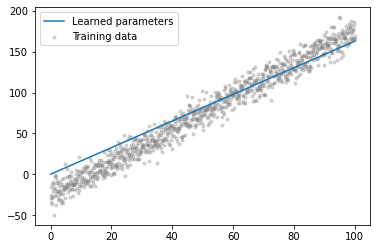

In [7]:
fig2, ax2 = plt.subplots()
ax2.scatter(x, y, color=colors[7], marker='.',
            alpha=0.3, label='Training data')
ax2.plot(x, y_learned, label='Learned parameters')
ax2.legend()
plt.show()

# Implementation in PyTorch

## Data in PyTorch

In [8]:
print('Numpy data:\tshape: {}\t\t\tdtype: {}'.format(x.shape, x.dtype))

# Change to tensor
x_torch = torch.tensor(x)
y_torch = torch.tensor(y)
print('To tensor:\tshape: {}\tdtype: {}' \
      .format(x_torch.shape, x_torch.dtype))

# Enforce the proper dtype
x_torch = x_torch.float()
y_torch = y_torch.float()
print('Enforce dtype:\tshape: {}\tdtype: {}' \
      .format(x_torch.shape, x_torch.dtype))

# Put into proper shape
x_torch = x_torch.unsqueeze(-1)
y_torch = y_torch.unsqueeze(-1)
print('Reshape:\tshape: {}\tdtype: {}' \
      .format(x_torch.shape, x_torch.dtype))

Numpy data:	shape: (1000,)			dtype: float64
To tensor:	shape: torch.Size([1000])	dtype: torch.float64
Enforce dtype:	shape: torch.Size([1000])	dtype: torch.float32
Reshape:	shape: torch.Size([1000, 1])	dtype: torch.float32


## Define the model

In [9]:
model = torch.nn.Linear(1, 1)   # 1 input, 1 output

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [11]:
loss_fn = torch.nn.MSELoss()

## Training loop

In [12]:
def train_torch(x, y, model, optimizer, loss_fn, epochs):
    for i in range(epochs):
        
        y_pred = model(x_torch)   # Forward prediction
        loss = loss_fn(y_pred, y_torch)     # Compute the loss
        
        optimizer.zero_grad()   # Reinitialize the gradients
        loss.backward()
        optimizer.step()
        
        if i % 1000 == 0:
            print("[{} / {}]".format(i, epochs))

In [13]:
train_torch(x_torch, y_torch, model, optimizer, loss_fn, epochs)

[0 / 10]


## Prediction

In [14]:
y_learned_torch = model(x_torch)
y_learned_torch = y_learned_torch.detach().numpy()

## Plot

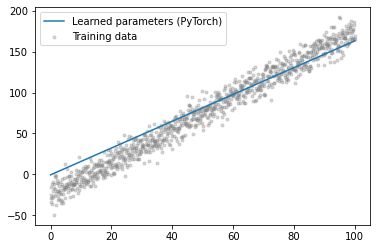

In [15]:
fig3, ax3 = plt.subplots()
ax3.scatter(x, y, marker='.', color=colors[7],
            alpha=0.3, label='Training data')
ax3.plot(x, y_learned_torch, label='Learned parameters (PyTorch)')
ax3.legend()
plt.show()

# Bonus: plotting error

In [16]:
def train_torch_with_loss(x, y, model, optimizer, loss_fn, epochs):
    loss_list = []
    for i in range(epochs):
        
        y_pred = model(x_torch)   # Forward prediction
        loss = loss_fn(y_pred, y_torch)     # Compute the loss
        
        optimizer.zero_grad()   # Reinitialize the gradients
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.item())
        
        if i % 1000 == 0:
            print("[{} / {}]".format(i, epochs))
    return loss_list

In [17]:
model2 = torch.nn.Linear(1, 1)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=1e-4)

loss_list2 = train_torch_with_loss(x_torch, y_torch, 
                                   model2, optimizer2, loss_fn, 10)

[0 / 10]


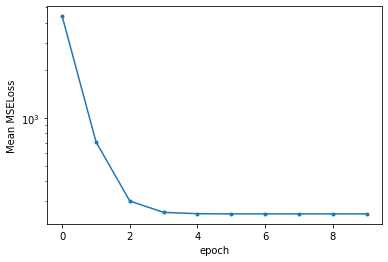

In [18]:
fig4, ax4 = plt.subplots()
ax4.plot(loss_list2, marker='.',)
ax4.set(xlabel='epoch', ylabel='Mean MSELoss', yscale='log')
plt.show()